# Filtro activo de segundo orden: Sallen-Key

Este filtro paso-bajo es útil para eliminar el ruido de alta frecuencia de una señal analógica. Se trata de un filtro activo, con la siguiente estructura:

![Sallen-Key](./Images/SallenKey.png)

La función de transferencia, ya expresada en términos de frecuencia, es:

$$
H(f) = \frac{V_o(f)}{V_i(f)} = \frac{K}{1 - \left(\frac{f}{f_c}\right)^2 + \frac{f}{Qf_c}j}
$$

Donde $K$ es la ganancia DC del filtro, $f_c$ es su frecuencia de corte, y $Q$ es el factor de calidad:

$$
K = 1 + \frac{R_4}{R_3} \qquad f_c = \frac{1}{2\pi\sqrt{R_1R_2C_1C_2}} \qquad Q = \frac{\sqrt{R_1R_2C_1C_2}}{R_1C_1 + R_2C_1 + R_1C_2\left(1 - K\right)}
$$

En nuestro caso, queremos que la ganancia DC sea 1, para que el filtro no modifique las señales de baja frecuencia. Lo más sencillo para conseguirlo es hacer $R_4$ igual a cero y/o $R_3$ igual a infinito:

![Sallen-Key de ganancia unidad](./Images/SallenKeyUnitGain.png)

Después de fijar $K$, nos quedan cuatro parámetros ($R_1$, $R_2$, $C_1$ y $C_2$) para ajustar dos características del filtro ($f_c$ y $Q$). Si hacemos los siguientes cambios de variable:

$$
R_1 = mR \qquad R_2 = R \qquad C_1 = C \qquad C_2=nC
$$

entonces podemos expresar $f_c$ y $Q$ de forma más simple:

$$
f_c = \frac{1}{2\pi RC\sqrt{mn}} \qquad Q = \frac{\sqrt{mn}}{m + 1}
$$

Para que el filtro sea de Butterworth, $Q$ tiene que valer $1/\sqrt{2}$. Una forma de asegurarlo es hacer que las dos resistencias sean iguales ($m = 1$), y luego despejar $n$ en la segunda ecuación, de donde se obtiene que $n$ debe ser igual a 2. Así, al final tenemos dos resistencias iguales $R_1$ y $R_2$, y un condensador $C_2$ con el doble de capacidad que $C_1$.

Para poder calcular el valor común de las resistencias $R$ que proporciona la frecuencia de corte deseada, se puede utilizar el código siguiente:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math, cmath

# Parámetros ajustables
fc = 10            # Frecuencia de corte en Hz
Q = 1/math.sqrt(2) # Factor de calidad (1/sqrt(2) para Butterworth)

# Parámetros fijos
m = 1.             # Relación entre resistencias
C = 330.e-9        # Capacidad del condensador C1 (el que va a tierra) en F

# Cálculo de n en función del ancho de banda Q
n = (Q*(m+1))**2/m

# Cálculo de R en función de fc
R = 1./(2*math.pi*C*fc*math.sqrt(m*n));

# Cálculo de los elementos del circuito
C1 = C
print(" C1 = %2.2f nF" % (C1*1e9))
C2 = n*C
print(" C2 = %2.2f nF" % (C2*1e9))
R1 = m*R
print(" R1 = %2.2f Ohm" % R1)
R2 = R
print(" R2 = %2.2f Ohm" % R2)

 C1 = 330.00 nF
 C2 = 660.00 nF
 R1 = 34102.89 Ohm
 R2 = 34102.89 Ohm


A continuación se muestra la función de transferencia del filtro. Se puede probar a modificar el valor de $Q$, para ver su efecto sobre la curva de ganancia:

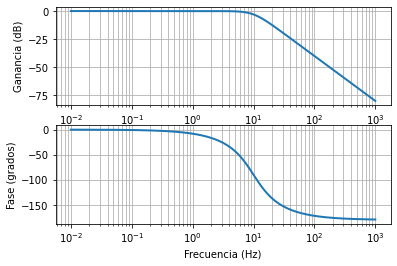

In [3]:
# Función de transferencia
s = lambda f: 2*math.pi*f*1j
H = lambda f: 1/(s(f)**2*R1*C1*R2*C2 + s(f)*(R1*C1+R2*C1) + 1)
M = lambda f: 20*math.log10(abs(H(f)));
A = lambda f: 180/math.pi*cmath.phase(H(f));

# Vector de frecuencias
freqs = np.logspace(-2, 3, 1000)

plt.subplot(2, 1, 1)
plt.semilogx(freqs, list(map(M, freqs)), lw = 2.0);
plt.ylabel("Ganancia (dB)")
plt.grid(which = "both")

plt.subplot(2, 1, 2)
plt.semilogx(freqs, list(map(A, freqs)), lw = 2.0);
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid(which = "both")